# トークトリアル 2

# 化合物フィルタリング: ADME とリードライクネスのクライテリア

#### Developed in the CADD seminars 2017 and 2018, AG Volkamer, Charité/FU Berlin 

Michele Ritschel and Mathias Wajnberg

## このトークトリアルの目的

ChEMBLから取得した化合物 (**talktorial 1**)をリードライクネスのクライテリアに基づきフィルタリングします。我々のスクリーニングライブラリーから薬らしくない分子を取り除くのが目的です。

* 化合物の生物学的利用可能性（バイオベイラビリティ）に関連するパラメータを計算(リピンスキーのルールオブファイブ)
* ルールオブファイブのクライテリアに基づきChEMBLから集めた化合物をフィルタリング
* レーダーチャート形式でパラメーターをプロット

## 学習の目標

### 理論
* ADME - 吸収: absorption, 分布: distribution, 代謝: metabolism and 排出: excretion
* リードライクネスとリピンスキーのルールオブファイブ
* リードライクネスの文脈におけるレーダーチャートのバリエーションと解釈

### 実践
* 例となる化合物について物理化学的パラメータを計算
* 複数の分子についてそれぞれの物理化学的パラメーターを比較するため棒グラフを作成
* ルールオブファイブを満たしているかチェックするための関数を定義
* ChEMBLから取得したデータセット全体にルールオブファイブを適用
* ルールオブファイブでフィルターをかけたデータセットのレーダーチャートを作成。これにより一つのプロットでルールオブファイブのクライテリアに関するプロパティの可視化が可能

## レファレンス

* ADME クライテリア: ADMEの説明 (https://en.wikipedia.org/wiki/ADME)と([<i>Mol Pharm.</i> (2010), <b>7(5)</b>, 1388-1405](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3025274/))
* SwissADME (http://www.swissadme.ch/)
* リード化合物: (https://en.wikipedia.org/wiki/Lead_compound)
* LogP (https://en.wikipedia.org/wiki/Partition_coefficient)
* Lipinski, Christopher A., et al. "Experimental and computational approaches to estimate solubility and permeability in drug discovery and development settings." ([<i>Adv. Drug Deliv. Rev.</i> (1997), <b>23</b>, 3-25](https://www.sciencedirect.com/science/article/pii/S0169409X96004231))
* Ritchie et al. "Graphical representation of ADME-related molecule properties for medicinal chemists" ([<i>Drug. Discov. Today</i> (2011), <b>16</b>, 65-72](https://www.ncbi.nlm.nih.gov/pubmed/21074634))

_____________________________________________________________________________________________________________________


## 理論

バーチャルスクリーニングでは、ある化合物が特定のターゲット分子に対して結合し、相互作用するかということを予測することができます。ですが、新しい医薬品を見つけ出すためには、その化合物がターゲット分子に到達し、最終的には体内から好ましい経路で取り除かれることが重要です。したがって、化合物が実際に体の中に取り込まれ、ターゲット分子に到達するためのて特定のバリアーを通過することができるかということも考慮しなければいけません。代謝的に安定か？そしてターゲット分子に対して作用しなくなったらどのように排出されるのか？これらの過程は薬物動態学（pharmacokinetics）の分野で研究されています。薬物動力学（pharmacodynamics）（「医薬品は私たちの体に何をするのか？」）とは対照的に、薬物動態学は「**私たちの体のなかで医薬品に対して何が起こるのか？**」という問いを扱います。

### ADME

薬物動態学は主に４つのステップに分けられます。
<strong>A</strong>bsorption：吸収、 
<strong>D</strong>istribution：分布、 
<strong>M</strong>etabolism：代謝、そして 
<strong>E</strong>xcretion：排出です。 
これら４ステップは <strong>ADME</strong>　と略されます。ADME(T) は<strong>T</strong>oxicology（毒性学）も含むことがあります。 
以下ではADMEの過程がより詳細に議論されています。 
([ADME wikipedia](https://en.wikipedia.org/wiki/ADME) and [<i>Mol Pharm.</i> (2010), <b>7(5)</b>, 1388-1405](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3025274/))


<img src="images/adme.png" class="center" align="right" width="260"> 


* **吸収**：ある物質が体内に取り込まれる量と取り込みに必要な時間は、各個人とその状態によって異なる様々な要因と、その物質の特性に依存しています。（低い）化合物溶解度と胃内容排出時間（gastric emptying time）、腸通過時間（intestinal transit time）、胃の中での化合物（不）安定性、そして腸壁の（不）透過能、といった要因が全て、医薬品が、例えば経口投与、吸入、そして皮膚への接触のあとでどの程度吸収されるかに影響をあたる可能性があります。
<br><br>
* **分布**：吸収された物質の分布、即ち体内における、血液とそれぞれの組織の間の分布、血液脳関門の透過は、局所的な血流速度や化合物のサイズと極性、そして血清中のタンパク質やトランスポーター酵素への結合の影響を受けます。毒性学における重要な要因としては脂肪組織への疎水性の高い物質の蓄積、あるいは血液脳関門の透過があげられます。
<br><br>
* **代謝**：化合物が体内に入るとすぐに、通常、化合物の代謝が始まります。つまり実際には、この化合物の一部だけがターゲット分子に到達します。主に肝臓と腎臓の酵素が生体異物（xenobiotics：体の外からきた物質）の分解を担っています。毒性のある化合物が取り除かれる場合、吸収された物質の量を減らすことは好ましいことです。その一方で、化学物質の変換は新たな毒性代謝物をうみだす可能性もあります。
<br><br>
* **排出**：化合物と代謝物は排出によって体内から取りのぞかれる必要があります。通常、腎臓（尿）あるいは糞によって排出されます。不完全な排出は結果として、外来物質の蓄積、あるいは通常の代謝を妨げることに繋がります。

<div align="right" width="250">Figure 1:ヒト体内におけるADME過程<br>
    (figure taken from openclipart.org and adapted) </div>

###  リードライクネスとリピンスキーのルールオブファイブ

[<strong>リード</strong>化合物](https://en.wikipedia.org/wiki/Lead_compound) とは有望な特性をもった医薬品開発の候補となる化合物です。望ましい医薬品を見つけ出すために構造修飾を行う出発点となる構造です。生理活性（*目標とするターゲット分子に結合する化合物*）に加えて、好ましいADME特性が有効な医薬品をデザインする上で重要なクライテリアです。

生物学的利用可能性（バイオアベイラビリティ）は重要なADME特性で、化合物の構造のみに基づいてこの特性を計るために、リピンスキーのルールオブファイブ（Lipinski's rule of five）が発明されました。これは経験則で、化合物の経口投与によるバイオアベイラビリティを見積もるのに役立ちます。

ルールオブファイブによると、ある化合物が次のルールの一つ以上を破っているとき、経口で体内に吸収される可能性が低くなるとされいます。そのルールとは即ち：

* 分子量が500ダルトン以下
* 水素結合アクセプターが10以下
* 水素結合ドナーが５以下
* LogP (オクタノールー水　分配係数) <= 5

[LogP](https://en.wikipedia.org/wiki/Partition_coefficient) は分配係数あるいはオクタノールー水分配係数とも呼ばれます。通常、疎水性（例：1-オクタノール）と親水性（例：水）の相の間における化合物の分配を測定します。

疎水性分子は水に対する溶解度が低くなる一方で、より親水性の分子（例：水素結合のアクセプターとドナーの数が多いもの）や大きな分子（分子量の大きいもの）は、リン脂質二重膜を透過しづらくなります。

ルールオブファイブに関して、全ての数字が５の倍数になっています。これがこのルールの名称の起源となっています。

([<i>Adv. Drug Deliv. Rev.</i> (1997), <b>23</b>, 3-25](https://www.sciencedirect.com/science/article/pii/S0169409X96004231))

### レーダーチャート

<img src="images/radarplot.png" class="center" align="right" width="250"> 

ルールオブファイブに関する分子の特性を計算した後で、その特性を可視化できると役に立ちます。Ritchieら([<i>Drug. Discov. Today</i> (2011), <b>16(1-2)</b>, 65-72](https://www.ncbi.nlm.nih.gov/pubmed/21074634))　はADMEに関する特性のグラフィカルな表現についての概観を示しています。分子の特性を可視化し、創薬化学者による解釈を手助けするために様々な手法があります（例：Craigプロット、フラワープロット、黄金の三角地帯（golden triangle））。

このチュートリアルではPythonの作図ライブラリである `matplotlib` を使ってレーダーチャートを作成する方法を学びます。その見た目から、レーダーチャート([radar charts wikipedia](https://en.wikipedia.org/wiki/Radar_chart)) はしばしばスパイダープロット、あるいはクモの巣グラフと呼ばれます。３６０度に沿って配置され、それぞれの条件に対して、中心から出発する軸を一つ持っています。各パラメーターの値は軸に沿ってプロットされ直線で結ばれています。影のついたエリアはパラメーターが条件を満たす領域を示します。

<div align="right" width="250">Figure 2: 化合物データセットの物理化学的特性を表すレーダーチャート </div>


## 実践

### 化合物例を定義し可視化する

ChEMBLから取り出したデータセット全体で実践する前に、４つの化合物を例として取り上げ、その化学的特性を調査したいと思います。必要なライブラリをインポートし、４化合物のSMILESを使って描画します。

In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
from rdkit.Chem import Draw
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from math import pi

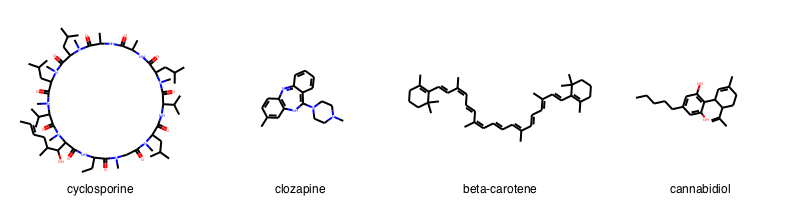

In [2]:
smiles_1 = 'CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(C(=O)NC(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N1)C(C(C)CC=CC)O)C)C(C)C)C)CC(C)C)C)CC(C)C)C)C)C)CC(C)C)C)C(C)C)CC(C)C)C)C' # Cyclosporine
smiles_2 = 'CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C' # Clozapine
smiles_3 = 'CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=C(C)C=CC2=C(CCCC2(C)C)C)C)C' # Beta-carotene
smiles_4 = 'CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O' # Cannabidiol
smiles_list = [smiles_1, smiles_2, smiles_3, smiles_4]
names_list = ['cyclosporine', 'clozapine', 'beta-carotene', 'cannabidiol']
mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

Draw.MolsToGridImage(mol_list, legends=names_list, molsPerRow=4)

### ルールオブファイブに関する分子の特性を計算しプロットする

ルールオブファイブに関する化学特性を計算し視覚的に比較します：

* 分子量、水素結合のアクセプター、ドナー、そしてLogPを計算
* [rdkit 記述子ライブラリ（descriptor library）](http://www.rdkit.org/docs/GettingStartedInPython.html#descriptor-calculation)　であらかじめ定義された関数を使用

In [3]:
MWs = [Descriptors.ExactMolWt(mol) for mol in mol_list]
HBAs = [Descriptors.NumHAcceptors(mol) for mol in mol_list]
HBDs = [Descriptors.NumHDonors(mol) for mol in mol_list]
LogPs = [Descriptors.MolLogP(mol) for mol in mol_list]
parameters = [MWs, HBAs, HBDs, LogPs]
print('Molecular weight of the four compounds:',MWs)

Molecular weight of the four compounds: [1201.841367992, 306.184446704, 536.438201792, 314.2245802]


* 分子ごとの特性を棒グラフでプロット

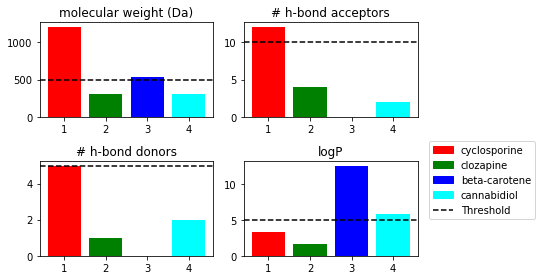

In [4]:
# 2x2のプロットの枠を作成
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
axes = [ax1, ax2, ax3, ax4]
x = np.arange(1, len(mol_list)+1)
colors = ['red', 'green', 'blue', 'cyan']

# サブプロットを作成
for index in x-1:
    axes[index].bar(x, parameters[index], color=colors)

# ルールオブファイブの閾値を点線で追加
ax1.axhline(y=500, color="black", linestyle="dashed")
ax1.set_title("molecular weight (Da)")
ax2.axhline(y=10, color="black", linestyle="dashed")
ax2.set_title("# h-bond acceptors")
ax3.axhline(y=5, color="black", linestyle="dashed")
ax3.set_title("# h-bond donors")
ax4.axhline(y=5, color="black", linestyle="dashed")
ax4.set_title("logP")

# 凡例の追加
legend_elements = [mpatches.Patch(color=colors[i], label=names_list[i]) for i in range(len(mol_list))]
legend_elements.append(Line2D([0], [0], color="black", ls="dashed", label="Threshold"))
fig.legend(handles=legend_elements, bbox_to_anchor=(1.25, 0.5))

# サブプロットと凡例を図に追加
plt.tight_layout()

plt.show()

上の棒グラフでは４例の化合物についてルールオブファイブの特性
（分子量、水素結合ドナー数、水素結合アクセプター数、LogP）を比較しました。４例の医薬品分子が異なる特性を持つことが見てとれます。次のステップでは各化合物のそれぞれについてルールオブファイブを逸脱しているかどうか調べます。

### リピンスキーのルールオブファイブに従っているかの調査

ある化合物がルールオブファイブを逸脱しているか否かを調べるための関数を定義し、４つの化合物例に適用します。

In [7]:
def test_rule_of_five(smi):
    m = Chem.MolFromSmiles(smi)
    
    # ルールオブファイブの化学特性を計算
    MW = Descriptors.ExactMolWt(m)
    HBA = Descriptors.NumHAcceptors(m)
    HBD = Descriptors.NumHDonors(m)
    LogP = Descriptors.MolLogP(m)
    
    # ルールオブファイブの条件
    conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
    # ４つの条件のうち逸脱が一つ以下の時にTrueを返す
    return conditions.count(True) >= 3

In [8]:
for i in range(len(smiles_list)):
    smi=smiles_list[i]
    name=names_list[i]
    print("Rule of five accepted for %s: %s "%(name,test_rule_of_five(smi)))                

Rule of five accepted for cyclosporine: False 
Rule of five accepted for clozapine: True 
Rule of five accepted for beta-carotene: False 
Rule of five accepted for cannabidiol: True 


我々の `test_rule_of_five` 関数によると４つの化合物例のうち２つはルールオブファイブを満たしていません。ここから、シクロスポリン（cyclosporin）とβ-カロテン（betacarotene）は経口で体内に吸収される可能性が低いと解釈できます。４つとも全て医薬品として市場で手に入るので、それぞれのターゲット分子にどうにかして到達しているはずです。ルールの例外である可能性もありますし、経口投与とは異なる投与ルートで使われている可能性もあります。

### EGFRデータセットにルールオブファイブを適用

`test_rule_of_five` 関数を使って、リピンスキーのルールオブファイブに従っているかを基準にして、目的のメインデータセットにフィルターをかけます。

* ルールオブファイブに関する化学特性を全て返すように関数を調整
* メインとなるデータフレームを読み込み (`ChEMBL_df`)
* ルールオブファイブの関数を`ChEMBL_df`　に適用
* ルールを２つ以上逸脱しているかによって `ChEMBL_df` にフィルターをかける
* フィルタリングした後のデータフレームを保存

In [9]:
def df_rule_of_five(df):
    
    smi = df['smiles']
    m = Chem.MolFromSmiles(smi)
    
    # ルールオブファイブの化学特性を計算
    MW = Descriptors.ExactMolWt(m)
    HBA = Descriptors.NumHAcceptors(m)
    HBD = Descriptors.NumHDonors(m)
    LogP = Descriptors.MolLogP(m)
    
    # ルールオブファイブの条件
    conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
    
    # 特性の値とルールオブファイブに従っているか否かについての情報をもつpandasの行を作成
    return pd.Series([MW, HBA, HBD, LogP, 'yes']) if conditions.count(True) >= 3 else pd.Series([MW, HBA, HBD, LogP, 'no'])


In [10]:
ChEMBL_df = pd.read_csv('../data/T1/EGFR_compounds.csv', index_col=0)
print(ChEMBL_df.shape)
ChEMBL_df.head()

(5428, 5)


,molecule_chembl_id,units,IC50,smiles,pIC50
0,CHEMBL63786,nM,0.003,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879
1,CHEMBL53711,nM,0.006,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849
2,CHEMBL35820,nM,0.006,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849
3,CHEMBL53753,nM,0.008,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910
4,CHEMBL66031,nM,0.008,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910


In [11]:
# ルールオブファイブの結果を得るために関数を適用 (しばらく時間がかかる可能性があります)
rule5_prop_df = ChEMBL_df.apply(df_rule_of_five, axis=1)

# 条件列に名前をつける
rule5_prop_df.columns= ['MW', 'HBA', 'HBD', 'LogP', 'rule_of_five_conform']

In [12]:
# 計算した値をもつデータセットを連結（concatenate）
ChEMBL_df = ChEMBL_df.join(rule5_prop_df)

In [13]:
# 空の行を削除 --> rule of five
filtered_df = ChEMBL_df[ChEMBL_df['rule_of_five_conform']=='yes']

In [14]:
# データに関する情報
print('# of compounds in unfiltered data set:', len(ChEMBL_df))
print('# of compounds in filtered data set:', len(filtered_df))
print("# of compounds not compliant with Lipinski's rule of five:", (len(ChEMBL_df)-len(filtered_df)))

# フィルターをかけたデータの保存
filtered_df.to_csv('../data/T2/EGFR_compounds_lipinski.csv', sep=';') 
filtered_df.head(10)

# of compounds in unfiltered data set: 5428
# of compounds in filtered data set: 4523
# of compounds not compliant with Lipinski's rule of five: 905


,molecule_chembl_id,units,IC50,smiles,pIC50,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL63786,nM,0.003,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,5.28910,yes
1,CHEMBL53711,nM,0.006,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,3.59690,yes
2,CHEMBL35820,nM,0.006,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,4.93330,yes
3,CHEMBL53753,nM,0.008,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,329.027607,5,2,3.57260,yes
4,CHEMBL66031,nM,0.008,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,339.011957,4,2,4.01220,yes
5,CHEMBL176582,nM,0.010,Cn1cnc2cc3ncnc(Nc4cccc(Br)c4)c3cc21,11.000000,353.027607,5,1,4.02260,yes
6,CHEMBL174426,nM,0.025,Cn1cnc2cc3c(Nc4cccc(Br)c4)ncnc3cc21,10.602060,353.027607,5,1,4.02260,yes
7,CHEMBL29197,nM,0.025,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,10.602060,359.026939,5,1,4.15310,yes
8,CHEMBL1243316,nM,0.030,C#CCNC/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N...,10.522879,477.136781,6,3,4.75878,yes
9,CHEMBL3613702,nM,0.037,C=CC(=O)Nc1ccc2ncnc(Nc3cc(F)c(Cl)c(Cl)c3)c2c1,10.431798,376.029395,4,2,4.94380,yes


### ルールオブファイブの特性を可視化するためのレーダープロット

まずデータセットの平均と標準偏差を求める関数を定義します。

これらの統計量はあとでデータセットのリピンスキーのルールオブファイブに関するパラメーターをプロットすることに使います。

In [15]:
def get_properties_stats(data_df):
    """
    データセットの物理化学特性の平均と標準偏差を計算する関数
    
    Input: 
    化合物ごとの物理化学特性の値、 HBD, HBA, MW そして　LogPを列として
    （正確にこのままの列名で）含むデータセット
    
    Output:
    物理化学特性（行）それぞれについて平均と標準偏差の値（列）をもつデータフレーム
    """
    properties = ["HBD", "HBA", "MW", "LogP"]
    
    data_stats = []
    
    for i in properties:
        std = data_df[i].std()
        mean = data_df[i].mean()
        da = pd.DataFrame([[round(mean, 2), round(std, 2)]], index=[i], columns=["mean", "std"])
        data_stats.append(da)
    
    data_stats = pd.concat(data_stats)
    
    return data_stats

リピンスキーのルールオブファイブに一致する化合物データセットの統計量を計算します（フィルタリングしたデータセット）。

In [16]:
stats_rof = get_properties_stats(filtered_df)
stats_rof

,mean,std
HBD,1.88,1.01
HBA,5.97,1.88
MW,413.03,87.93
LogP,4.07,1.19


リピンスキーのルールオブファイブに合致しない化合物データセットの統計量を計算します。

In [17]:
stats_not_rof = get_properties_stats(ChEMBL_df[ChEMBL_df['rule_of_five_conform']=='no'])
stats_not_rof

,mean,std
HBD,2.30,1.74
HBA,7.99,2.37
MW,588.96,103.05
LogP,5.96,1.44


レーダーチャートで化合物特性を可視化する関数を作成します。[stackoverflowのチュートリアル](https://stackoverflow.com/questions/42227409/tutorial-for-python-radar-chart-plot)に従って行います。

In [18]:
def plot_radarplot(data_stats, output_path):
    """
    ４つの物理化学特性（HBD、HBA、MW、LogP)の平均と標準偏差に基づくレーダープロットを作成する関数
    
    Input: 
    それぞれの物理化学特性（行）について平均と標準偏差（列）を有するデータフレーム。
    
    Output:
    レーダープロット (ファイルとして保存し、Jupyter notebookにも表示する)。
    """

    # 線を引くためのデータポイントを取得
    std_1 = [data_stats["mean"]["HBD"] + data_stats["std"]["HBD"], 
             (data_stats["mean"]["HBA"]/2) + (data_stats["std"]["HBA"]/2), 
             (data_stats["mean"]["MW"]/100) + (data_stats["std"]["MW"]/100), 
             data_stats["mean"]["LogP"] + data_stats["std"]["LogP"]]
    std_2 = [data_stats["mean"]["HBD"] - data_stats["std"]["HBD"], 
             (data_stats["mean"]["HBA"]/2) - (data_stats["std"]["HBA"]/2), 
             (data_stats["mean"]["MW"]/100) - (data_stats["std"]["MW"]/100), 
             data_stats["mean"]["LogP"] - data_stats["std"]["LogP"]]
    mean_val = [data_stats["mean"]["HBD"], (data_stats["mean"]["HBA"]/2), 
                (data_stats["mean"]["MW"]/100), data_stats["mean"]["LogP"]]

    # （塗りつぶされた）領域のデータポイント（ルールオブファイブ）を取得
    rule_conditions = [5, (10/2), (500/100), 5]
    
    # 特性の名称を定義
    parameters = ['# H-bond donors', '# H-bond acceptors/2', 'Molecular weight (Da)/100', 'LogP']

    # 
    N = len(rule_conditions)

    # フォントサイズを指定
    fontsize = 16

    # 条件の軸の角度
    x_as = [n / float(N) * 2 * pi for n in range(N)]

    # 円型チャートなので各リストの最初の値のコピーを、
    # 各リストの最後にデータとともに追加する必要があります。
    std_1 += std_1[:1]
    std_2 += std_2[:1]
    mean_val += mean_val[:1]
    rule_conditions += rule_conditions[:1]
    x_as += x_as[:1]

    # 図のサイズを指定
    plt.figure(figsize=(8,8))

    # 軸の色を指定
    plt.rc('axes', linewidth=2, edgecolor="#888888")

    # 極座標プロット（polar plot）の作成
    ax = plt.subplot(111, polar=True)

    # 時計回りを指定。つまり：
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # y軸のラベル位置を指定
    ax.set_rlabel_position(0)

    # グリッドの色と線のスタイルを指定
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=2)
    ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=2)

    # 放射状の数の指定とラベルの除去
    plt.xticks(x_as[:-1], [])

    # y軸の印（ytick）の指定
    plt.yticks([1, 3, 5, 7], ["1", "3", "5"], size=fontsize)

    # 軸の範囲（limit）の指定
    plt.ylim(0, 7)

    # データをプロット
    # 平均値
    ax.plot(x_as, mean_val, 'b', linewidth=3, linestyle='solid', zorder=3)

    # 標準偏差
    ax.plot(x_as, std_1, 'm', linewidth=2, linestyle='dashed', zorder=3, color='#111111')
    ax.plot(x_as, std_2, 'y', linewidth=2, linestyle='dashed', zorder=3, color='#333333')

    # 領域を塗りつぶす
    ax.fill(x_as, rule_conditions, "#3465a4", alpha=0.2)

    # 正しくフィットしていることを確かめるためにy軸の印のラベルを描く
    for i in range(N):
        angle_rad = i / float(N) * 2 * pi
        if angle_rad == 0:
            ha, distance_ax = "center", 1
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 1
        elif angle_rad == pi:
            ha, distance_ax = "center", 1
        else:
            ha, distance_ax = "right", 1
        ax.text(angle_rad, 7 + distance_ax, parameters[i], size=fontsize,
                horizontalalignment=ha, verticalalignment="center")

    # 左上のプロットに合わせて凡例を追加 
        labels = ('Mean', 'Mean + std', 'Mean - std', 'Rule of five area')
        legend = ax.legend(labels, loc=(1.1, .7),
                           labelspacing=0.3, fontsize=fontsize)
    plt.tight_layout()

    # プロットを保存　- テキストボックスを含めるために bbox_inches　を使用：
    # https://stackoverflow.com/questions/44642082/text-or-legend-cut-from-matplotlib-figure-on-savefig?rq=1
    plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=True)

    # 極座標プロットを表示
    plt.show()

まず、ルールオブファイブでフィルタリングしたデータセットをプロットします。

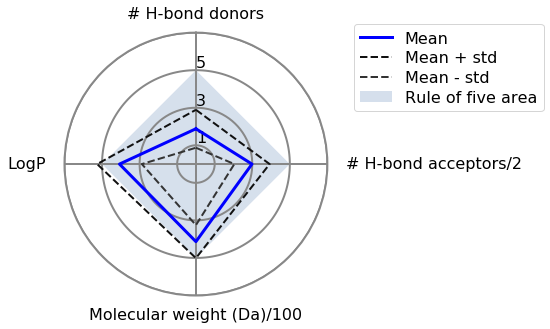

In [19]:
plot_radarplot(stats_rof, "../data/T2/radarplot_rof.png")

上で作られたレーダチャートで、青色の四角は物理化学特性がルールオブファイブの基準の中に収まっている領域を表します。青線はフィルタリングしたデータセットの平均値を結んだもので、点線は標準偏差を結んだものです。平均値はリピンスキーのルールのどれも逸脱していないということがわかります。ですが、標準偏差をみると、いくつかの特性値はまだ閾値よりも大きくなっています。これは許容範囲内です。４つの特性のルールのうち一つは逸脱する可能性があるということを覚えておいてください。

次に、ルールオブファイブを逸脱した化合物を眺めます。


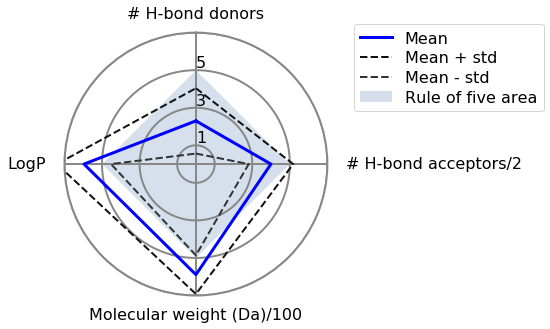

In [20]:
plot_radarplot(stats_not_rof, "../data/T2/radarplot_not_rof.png")

ルールオブファイブに従っていない化合物の特性のほとんどが、LogPと分子量によってルールを外れていることがわかります。

## ディスカッション

リピンスキーのルールオブファイブは経口吸収性（バイオアベイラビリティ）に焦点をあてています。医薬品は経口以外の投与ルートでも投与可能です（例：吸入、経皮、注射）。ルールオブファイブは経口投与における生物学的利用可能性の指標であって、例外はあるのだということに注意してください。バイオアベイラビリティを題材に、いくつかのADME特性の一つを見てきました。

ADME特性の全体像を手にするために利用可能なwebサーバーとプログラムがあります。　例： [SwissADME](http://www.swissadme.ch/).

## クイズ
* ルールオブファイブで表現された化学特性はADMEに対してどのような影響を与えうるでしょうか？
* ３つ、あるいは４つのルールを逸脱するような分子を見つけるか、デザインしてください。
* 上で作成したレーダーチャートに新しい化合物の情報を追加でプロットするにはどうすればよいでしょうか？